This script builds, trains, and evaluates a nueral network surrogate model to predict the deflection of a beam based on the generated dataset.

In [171]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import time

In [172]:
# --- 1. Load Data ---
print("Loadind dataset...")
df = pd.read_csv(r"C:\Users\pasch\OneDrive\PortalFrameAnalysis\beam_deflection_dataset.csv")
print("Dataset loaded successfully.")
print("\nDataset Info:")
df.info()
print("\nFirst 5 rows of the dataset:")
print(df.info())

Loadind dataset...
Dataset loaded successfully.

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   k0        2000 non-null   float64
 1   k1        2000 non-null   float64
 2   damping   2000 non-null   float64
 3   velocity  2000 non-null   float64
 4   w_max     2000 non-null   float64
dtypes: float64(5)
memory usage: 78.3 KB

First 5 rows of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   k0        2000 non-null   float64
 1   k1        2000 non-null   float64
 2   damping   2000 non-null   float64
 3   velocity  2000 non-null   float64
 4   w_max     2000 non-null   float64
dtypes: float64(5)
memory usage: 78.3 KB
None


In [173]:
df

,k0,k1,damping,velocity,w_max
0,1.073641e+08,148746.025235,0.020847,20.553105,0.000084
1,2.277191e+07,84102.166772,0.065196,25.656706,0.000268
2,9.175781e+07,31225.232905,0.171639,29.383616,0.000095
3,3.972292e+07,107823.087179,0.047984,62.910787,0.000183
4,1.901094e+07,157633.258648,0.018515,72.599706,0.000309
...,...,...,...,...,...
1995,1.340495e+08,68238.118267,0.081144,71.546504,0.000073
1996,7.674841e+07,118055.199765,0.024334,48.119528,0.000110
1997,1.322220e+07,153852.980762,0.080516,60.188139,0.000402
1998,1.885010e+08,69389.389191,0.194409,10.906861,0.000055


In [174]:
df.head()

,k0,k1,damping,velocity,w_max
0,1.073641e+08,148746.025235,0.020847,20.553105,0.000084
1,2.277191e+07,84102.166772,0.065196,25.656706,0.000268
2,9.175781e+07,31225.232905,0.171639,29.383616,0.000095
3,3.972292e+07,107823.087179,0.047984,62.910787,0.000183
4,1.901094e+07,157633.258648,0.018515,72.599706,0.000309


In [175]:
df.tail()

,k0,k1,damping,velocity,w_max
1995,1.340495e+08,68238.118267,0.081144,71.546504,0.000073
1996,7.674841e+07,118055.199765,0.024334,48.119528,0.000110
1997,1.322220e+07,153852.980762,0.080516,60.188139,0.000402
1998,1.885010e+08,69389.389191,0.194409,10.906861,0.000055
1999,1.941723e+08,66850.480956,0.152075,18.918527,0.000054


In [176]:
# --- 2. Data Pre-processing ---

# Separate the inpute features (x) from the output target (y).
x = df[['k0', 'k1', 'damping', 'velocity']]
y = df['w_max']

In [177]:
# Split data into training + validation (85%) and testing (15%) sets.
x_train_val, x_test, y_train_val, y_test = train_test_split(x, y, test_size=0.15, random_state=42)

In [178]:
# Split the 85% block into training (70%) and validation (15%)
# The new test_size is 15/85 to get 15% of the original total data.
x_train, x_val, y_train, y_val = train_test_split(x_train_val, y_train_val, test_size=(0.15/0.85), random_state=42)

In [179]:
len(x_train)

1400

In [180]:
len(x_test)

300

In [181]:
# scale the input features
# We fit the scaler ONLY on the training data to prvent data leakage.
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_val_scaled = scaler.transform(x_val)
x_test_scaled = scaler.transform(x_test)


In [182]:
print(F"\nData split complete (70/15/15).")
print(F"Total samples: {len(df)}")
print(F"Training samples: {len(x_train)}")
print(F"Validation samples: {len(x_val)}")
print(F"Testing samples: {len(x_test)}")


Data split complete (70/15/15).
Total samples: 2000
Training samples: 1400
Validation samples: 300
Testing samples: 300


In [183]:
# --- 3. Build the Neural Network Model ---
print("\nBuilding the Neural Network Model...")



Building the Neural Network Model...


In [184]:
# Input Layer: The shape must match the number of input features (4).
model = tf.keras.Sequential([tf.keras.layers.Input(shape=(x_train_scaled.shape[1],)),
                             
# First hidden layer with 128 neurons and ReLU activation function.
tf.keras.layers.Dense(128, activation='relu'),

# Second hidden layer with 64 neurons.
tf.keras.layers.Dense(64, activation='relu'),

# Third hidden layer with 32 neurons.
tf.keras.layers.Dense(32, activation='relu'),

# Output Layer: A Single neuron for the regression output (w_max).
tf.keras.layers.Dense(1)
])

In [185]:
# Compile the model.
# We define the Optimizer (Adam), Loss function (Mean Squared Error), and any Metrics to track.
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae', 'mse'])

In [186]:
# Print a summary of the model architecture.
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_22 (Dense)                │ (None, 128)            │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,009 (43.00 KB)

 Trainable params: 11,009 (43.00 KB)

 Non-trainable params: 0 (0.00 B)

In [187]:
# --- 4. Train the Model ---
print("\nTraining the model...")
start_time = time.time()


Training the model...


In [188]:
# Define an EarlyStopping callback to prevent overfitting.
# This will monitor and stop training if the validation loss does not improve for 20 epochs.
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True) # Restores model weights from the best epoch.


In [189]:
# Train the model
# We use 15% of the training data for validation.
# The batch size is set to 32, and we train for a maximum of 500 epochs.
# The `verbose` parameter is set to 1 to display training progress.
history = model.fit(x_train_scaled, y_train, epochs=500, validation_split=0.15, batch_size=32, callbacks=[early_stopping], verbose=[1])

Epoch 1/500
Epoch 2/500
Epoch 3/500
Epoch 4/500
Epoch 5/500
Epoch 6/500
Epoch 7/500
Epoch 8/500
Epoch 9/500
Epoch 10/500
Epoch 11/500
Epoch 12/500
Epoch 13/500
Epoch 14/500
Epoch 15/500
Epoch 16/500
Epoch 17/500
Epoch 18/500
Epoch 19/500
Epoch 20/500
Epoch 21/500
Epoch 22/500
Epoch 23/500
Epoch 24/500
Epoch 25/500
Epoch 26/500
Epoch 27/500
Epoch 28/500
Epoch 29/500
Epoch 30/500
Epoch 31/500
Epoch 32/500
Epoch 33/500
Epoch 34/500
Epoch 35/500
Epoch 36/500
Epoch 37/500
Epoch 38/500
Epoch 39/500
Epoch 40/500
Epoch 41/500
Epoch 42/500
Epoch 43/500
Epoch 44/500
Epoch 45/500
Epoch 46/500
Epoch 47/500
Epoch 48/500
Epoch 49/500
Epoch 50/500
Epoch 51/500
Epoch 52/500
Epoch 53/500
Epoch 54/500
Epoch 55/500
Epoch 56/500
Epoch 57/500
Epoch 58/500
Epoch 59/500
Epoch 60/500
Epoch 61/500
Epoch 62/500
Epoch 63/500
Epoch 64/500
Epoch 65/500
Epoch 66/500
Epoch 67/500
Epoch 68/500
Epoch 69/500
Epoch 70/500
Epoch 71/500
Epoch 72/500
Epoch 73/500
Epoch 74/500
Epoch 75/500
Epoch 76/500
Epoch 77/500
Epoch 78

In [190]:
end_time = time.time()
training_time = end_time - start_time
print(F"\nTraining complete.")
print(F"\nTraining time: {training_time:.2f} seconds.")


Training complete.

Training time: 28.64 seconds.


In [191]:
# --- 5. Evaluate the Model ---
print(F"\nEvaluating the Model on the test set...")


Evaluating the Model on the test set...


In [192]:
# Make predictions on the unseen test data
y_pred = model.predict(x_test_scaled).flatten() # flatten converts a column vector

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


In [193]:
print(y_test.shape)
print(y_pred.shape)
print(x_test_scaled.shape)

(300,)
(300,)
(300, 4)


In [194]:
# Calculate performance metrics.

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

In [195]:
print(F"R2 Score: {r2:.4f}")
print(F"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(F"Mean Absolute Error (MAE): {mae:.4f}")

R2 Score: -47.6809
Root Mean Squared Error (RMSE): 0.0005
Mean Absolute Error (MAE): 0.0004


y_test min: 5.29800565514084e-05
y_test max: 0.0004958765309274
y_test mean: 0.00011285844539389159
y_test std (variance): 7.44660116818775e-05
y_pred min: -0.0034675342
y_pred max: 0.0018459298
y_pred mean: 2.358407e-05
y_pred std (variance): 0.0005337749


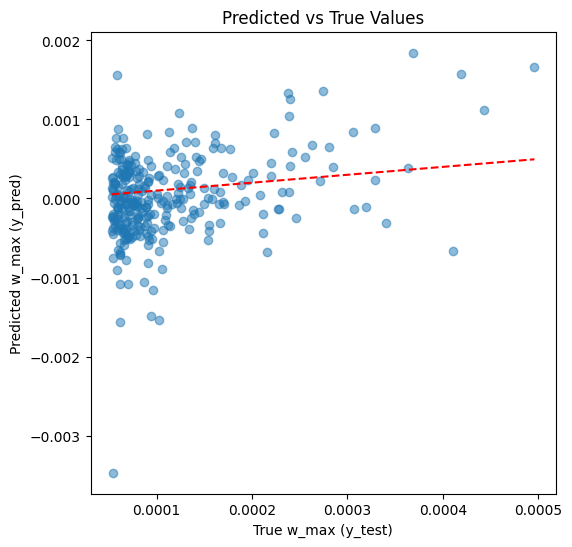

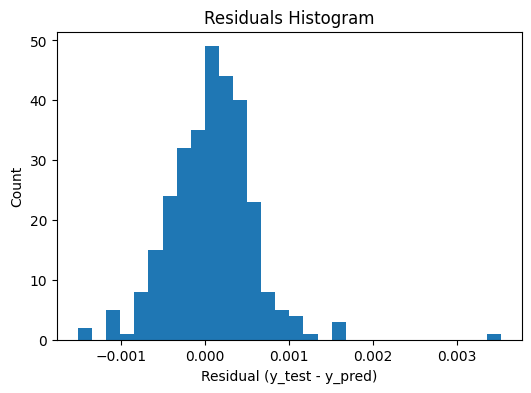

In [196]:
import matplotlib.pyplot as plt

# 1. Check the range and variance of your target
print("y_test min:", np.min(y_test))
print("y_test max:", np.max(y_test))
print("y_test mean:", np.mean(y_test))
print("y_test std (variance):", np.std(y_test))

# 2. Check the range and variance of your predictions
print("y_pred min:", np.min(y_pred))
print("y_pred max:", np.max(y_pred))
print("y_pred mean:", np.mean(y_pred))
print("y_pred std (variance):", np.std(y_pred))

# 3. Plot y_test vs y_pred
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("True w_max (y_test)")
plt.ylabel("Predicted w_max (y_pred)")
plt.title("Predicted vs True Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--')  # y=x line
plt.show()

# 4. Plot residuals
plt.figure(figsize=(6,4))
plt.hist(y_test - y_pred, bins=30)
plt.xlabel("Residual (y_test - y_pred)")
plt.ylabel("Count")
plt.title("Residuals Histogram")
plt.show()